In [1]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re
import neattext.functions as nfx
# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


In [2]:



# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 80



In [3]:
#data=pd.read_csv('dataset/isear.csv')
data=pd.read_csv('dataset/dailydialog.csv')
#data=pd.read_csv('dataset/emotion-stimulus.csv')
#data=pd.read_csv('dataset/text_emotion.csv')

In [4]:
data['Emotion'].value_counts()

0    85572
4    12885
6     1823
5     1150
1     1022
2      353
3      174
Name: Emotion, dtype: int64

In [5]:

dir(nfx)




['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [6]:

data['Clean_Text']=data['Text'].apply(nfx.remove_special_characters)

In [7]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_punctuations)

In [8]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_stopwords)

In [9]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_userhandles)

In [10]:
data[['Text','Clean_Text']]

,Text,Clean_Text
0,"Say , Jim , how about going for a few beers af...",Jim going beers dinner
1,You know that is tempting but is really not g...,know tempting good fitness
2,What do you mean ? It will help us to relax .,mean help relax
3,Do you really think so ? I don't . It will ju...,think dont fat act silly Remember time
4,I guess you are right.But what shall we do ? ...,guess rightBut shall dont feel like sitting home
...,...,...
102974,"Oh , it must be very precious . Is it breakab...",Oh precious breakable
102975,"No , if you take some care when you use them .",care use
102976,How much is it ?,
102977,Two thousand .,thousand


In [11]:
data['Emotion'].value_counts()

0    85572
4    12885
6     1823
5     1150
1     1022
2      353
3      174
Name: Emotion, dtype: int64

In [12]:
#Daily Dialog:

#sent_to_id  = {"sad":0, "anger":1, "happy":2, "fear":3, "surprise":4, "shame":5, "disgust":6}


#Isear:
#sent_to_id  = {"joy":0, "fear":1, "anger":2, "sadness":3, "disgust":4, "shame":5, "guilt":6}

# Tweet Emotion:
#sent_to_id  = {"neutral":0, "worry":1, "happiness":2, "sadness":3, "love":4, "surprise":5, "fun":6, "relief":7, "hate":8, "empty":9, "enthusiasm":10, "boredom":11, "anger":12}

In [13]:
#data["sentiment_id"] = data['sentiment'].map(sent_to_id)

In [14]:
#data["sentiment_id"]

In [15]:
data

,Emotion,Text,Clean_Text
0,0,"Say , Jim , how about going for a few beers af...",Jim going beers dinner
1,0,You know that is tempting but is really not g...,know tempting good fitness
2,0,What do you mean ? It will help us to relax .,mean help relax
3,0,Do you really think so ? I don't . It will ju...,think dont fat act silly Remember time
4,0,I guess you are right.But what shall we do ? ...,guess rightBut shall dont feel like sitting home
...,...,...,...
102974,0,"Oh , it must be very precious . Is it breakab...",Oh precious breakable
102975,0,"No , if you take some care when you use them .",care use
102976,0,How much is it ?,
102977,0,Two thousand .,thousand


In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data.Emotion)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [17]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [18]:
Xfeatures=data['Clean_Text']

In [19]:
#final = data[['Clean_Text', 'Emotion']]
#print("Train DataFrame")
#display(final.head(3))

In [20]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeatures,Y, random_state=42, test_size=0.2, shuffle=True)

In [21]:
from keras.preprocessing import sequence, text
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
token = text.Tokenizer()
token.fit_on_texts(list(X_train) + list(X_test))

index_of_words = token.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=max_seq_len)
X_test_pad = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=max_seq_len)

Number of unique words: 22652


In [22]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath,encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [23]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r',encoding="utf8") as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

In [24]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(22653, 300)

In [25]:
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 17842
New words found: 4810


In [27]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [33]:
#LSTM
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
gru_output_size = 64
bidirectional = True

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(7, activation='softmax'))

#cnn
#kernel_size = 3
#filters = 256

#model = Sequential()
#model.add(embedd_layer)
#model.add(Conv1D(filters, kernel_size, activation='relu'))
#model.add(GlobalMaxPooling1D())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(13, activation='softmax'))

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 300)           6795900   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              140544    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 6,937,347
Trainable params: 141,447
Non-trainable params: 6,795,900
_________________________________________________________________


In [35]:
batch_size = 128
epochs = 7

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/7
644/644 [==============================] - 327s 501ms/step - loss: 0.5515 - accuracy: 0.8413 - val_loss: 0.4884 - val_accuracy: 0.8486
Epoch 2/7
644/644 [==============================] - 304s 473ms/step - loss: 0.4718 - accuracy: 0.8506 - val_loss: 0.4711 - val_accuracy: 0.8501
Epoch 3/7
644/644 [==============================] - 300s 466ms/step - loss: 0.4600 - accuracy: 0.8534 - val_loss: 0.4654 - val_accuracy: 0.8527
Epoch 4/7
644/644 [==============================] - 309s 480ms/step - loss: 0.4537 - accuracy: 0.8538 - val_loss: 0.4598 - val_accuracy: 0.8537
Epoch 5/7
644/644 [==============================] - 316s 491ms/step - loss: 0.4475 - accuracy: 0.8554 - val_loss: 0.4575 - val_accuracy: 0.8523
Epoch 6/7
644/644 [==============================] - 295s 457ms/step - loss: 0.4425 - accuracy: 0.8559 - val_loss: 0.4527 - val_accuracy: 0.8542
Epoch 7/7
644/644 [==============================] - 280s 435ms/step - loss: 0.4374 - accuracy: 0.8566 - val_loss: 0.4507 - val_ac

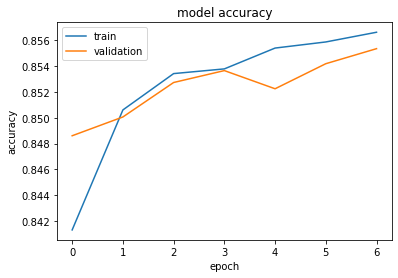

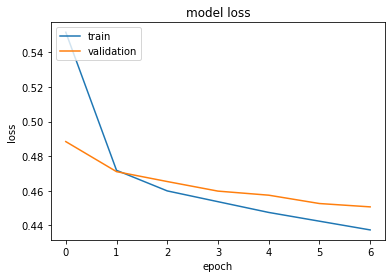

In [36]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn import metrics

y_test_arg=np.argmax(y_test,axis=1)

predicted = model.predict(X_test_pad)
predict_classes=np.argmax(predicted,axis=1)
predict_classes[1]                        
print('Confusion Matrix')
print(metrics.classification_report(y_test_arg, predict_classes))

Confusion Matrix
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17078
           1       1.00      0.02      0.04       199
           2       0.60      0.04      0.08        73
           3       0.00      0.00      0.00        46
           4       0.64      0.43      0.51      2626
           5       0.00      0.00      0.00       233
           6       0.53      0.09      0.15       341

    accuracy                           0.86     20596
   macro avg       0.52      0.22      0.24     20596
weighted avg       0.83      0.86      0.83     20596



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score

predicted = model.predict(X_test_pad)
predict_classes=np.argmax(predicted,axis=1)
predict_classes[1]   

roc_auc_score(y_test_arg,predict_classes,multi_class="ovo")

AxisError: axis 1 is out of bounds for array of dimension 1